<a href="https://colab.research.google.com/github/nickyshox99/SuperAI/blob/master/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ติดตั้ง request และ beautifulsoup กันก่อน

In [ ]:
!pip install requests
!pip install beautifulsoup4

connect google drive สำหรับเก็บไฟล์ถาวร


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

import os

PathData ='/content/drive/MyDrive/WebScraping/data/'
targetFolder = 'target/'
dataStoreFolder = 'datastore/'
labelPath = PathData+ targetFolder +'category.txt'
contentWithHeadingPath = PathData+dataStoreFolder+'/AllArticles_HeadingPlusContent.txt'
contentPath = PathData+dataStoreFolder+'/AllArticles_OnlyContent.txt'

allWordPath = '/content/drive/MyDrive/WebScraping/word.txt'
uniqueCatePath = '/content/drive/MyDrive/WebScraping/uniqueCategory.txt'
modelPath = '/content/drive/MyDrive/WebScraping/trainnedmodel.md'

Mounted at /content/drive/


#Part01 : Web Scraping

In [ ]:
from bs4 import BeautifulSoup
import requests

In [ ]:
baseURL = "http://www.it.kmitl.ac.th/~teerapong/news_archive/"
mainPage = "index.html"
mainURL = baseURL+mainPage

เข้าหน้าเวปเป้าหมายที่ต้องการ

In [ ]:
res = requests.get(mainURL)
res.encoding = "utf-8"

ตรวจสอบผลการดึงข้อมูล จะได้ข้อมูล html มา

In [ ]:
print(res.text)

<!DOCTYPE html>
<html lang="en">

<head>
	<title>Online News Archive</title>
	<meta charset="utf-8">
	<meta name="viewport" content="width=device-width, initial-scale=1">
    <meta name="robots" content="noindex">
    <meta name="keywords" content="news,articles,news"/>
	<meta property="og:title" content="Breaking News | International Headlines">
	<meta property="og:site_name" content="News Archive">
	<meta property="og:description" content="Latest news and more from the definitive brand of quality news.">
	<link rel="stylesheet" href="css/bootstrap.min.css">
	<script src="js/jquery-3.2.1.slim.min.js"></script>
	<script src="js/popper.min.js"></script>
	<script src="js/tether.min.js"></script>
	<script src="js/jquery-3.2.1.slim.min.js"></script> 
	<script src="js/popper.min.js"></script>
	<script src="js/tether.min.js"></script>
	<script src="js/bootstrap.min.js"></script>
	  <style>
	  		.main{ padding: 0; text-align: center;}
	  		.footer{ padding: 6px;text-align: center; margin-top:

เริ่มใช้ beautiful soup ตรวจสอบหัวข้อหรือลิงค์ที่ต้องไปต่อ


In [ ]:
soup = BeautifulSoup(res.text, 'html.parser')

ค้นหา tag เป้าหมายของเรา นั้นก็คือ tag li

In [ ]:
tagli = soup.find_all('li')
tagli

[<li>Articles — <a href="month-jan-2017.html">January</a> [118]</li>,
 <li>Articles — <a href="month-feb-2017.html">February</a> [124]</li>,
 <li>Articles — <a href="month-mar-2017.html">March</a> [116]</li>,
 <li>Articles — <a href="month-apr-2017.html">April</a> [118]</li>,
 <li>Articles — <a href="month-may-2017.html">May</a> [115]</li>,
 <li>Articles — <a href="month-jun-2017.html">June</a> [115]</li>,
 <li>Articles — <a href="month-jul-2017.html">July</a> [122]</li>,
 <li>Articles — <a href="month-aug-2017.html">August</a> [116]</li>,
 <li>Articles — <a href="month-sep-2017.html">September</a> [113]</li>,
 <li>Articles — <a href="month-oct-2017.html">October</a> [124]</li>,
 <li>Articles — <a href="month-nov-2017.html">November</a> [122]</li>,
 <li>Articles — <a href="month-dec-2017.html">December</a> [115]</li>]

สร้าง List ขึ้นมาเก็บ Link URL ของแต่ละเดือนเพื่อเข้าไปสำรวจต่อไป

In [ ]:
listLinkURL= []
for i,x in enumerate(tagli):  
   tagA = x.findAll('a')      
   print(tagA[0]['href'])
   listLinkURL.append(baseURL+tagA[0]['href'])

# print(listLinkURL)

month-jan-2017.html
month-feb-2017.html
month-mar-2017.html
month-apr-2017.html
month-may-2017.html
month-jun-2017.html
month-jul-2017.html
month-aug-2017.html
month-sep-2017.html
month-oct-2017.html
month-nov-2017.html
month-dec-2017.html


In [ ]:
listLinkURL

['http://www.it.kmitl.ac.th/~teerapong/news_archive/month-jan-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-feb-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-mar-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-apr-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-may-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-jun-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-jul-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-aug-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-sep-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-oct-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-nov-2017.html',
 'http://www.it.kmitl.ac.th/~teerapong/news_archive/month-dec-2017.html']

เราจะวน Loop เข้าแต่ละลิงค์

In [ ]:
#ใน listCategoryKey จะเก็บ item ลักษณะนี้เข้าไป [ [1,'technology'],[2,'business'],[3,'technology'] ]
currentId = 1   #ใช้รัน id content
listCategoryKey = []

#ใน listContent จะเก็บ item ลักษณะนี้เข้าไป [[id,title,content]]
listContent = []

for i,mainLink in enumerate(listLinkURL):
  #สร้าง list เพื่อเก็บ URL ของแต่ละ Article
  listArticleURL=[]
  res = requests.get(mainLink)
  res.encoding = "utf-8"
  soup = BeautifulSoup(res.text, 'html.parser')
  tagTr = soup.find_all('tr')
  for TrIndex,x in enumerate(tagTr):
    tagTd = x.findAll('td',attrs={'class':'category'})
    if(len(tagTd)>0):
      tmpCategory = tagTd[0].text.replace('\xa0','')
      tagTd = x.findAll('td',attrs={'class':'title'})
      tagATitle = tagTd[0].find_all('a')
      if(len(tagATitle)>0):
        #เอา URL ของแต่ละ Article มาเพื่อเตรียมเข้าไปอ่าน Content ภายใน
        tmpUrl = baseURL+tagATitle[0]['href']
        listArticleURL.append([currentId,tmpUrl,tagATitle[0].text])
        listCategoryKey.append([currentId,tmpCategory.lower()])
        print(tmpUrl)
        print(tmpCategory)
        currentId +=1

  #เข้าไปอ่าน content ในแต่ละ article
  for indexArticle,itemArticle in enumerate(listArticleURL):
    tmpID = itemArticle[0]
    tmpURL = itemArticle[1]
    tmpTitle = itemArticle[2]
    res2 = requests.get(tmpURL)
    res2.encoding = "utf-8"
    soup2 = BeautifulSoup(res2.text, 'html.parser')
    tagP = soup2.find_all('p')
    
    tmpContent=""
    for pIndex, tagPItem in enumerate(tagP):
      if tagPItem.get('class')==None:
        tmpContent+=tagPItem.text

    print("Add List Content : ",tmpID,tmpTitle)            
    listContent.append([tmpID,tmpTitle,tmpContent])

http://www.it.kmitl.ac.th/~teerapong/news_archive/article-jan-0418.html
technology
http://www.it.kmitl.ac.th/~teerapong/news_archive/article-jan-0027.html
business
http://www.it.kmitl.ac.th/~teerapong/news_archive/article-jan-0631.html
technology
http://www.it.kmitl.ac.th/~teerapong/news_archive/article-jan-2105.html
business
http://www.it.kmitl.ac.th/~teerapong/news_archive/article-jan-3300.html
sport
http://www.it.kmitl.ac.th/~teerapong/news_archive/article-jan-4187.html
sport
http://www.it.kmitl.ac.th/~teerapong/news_archive/article-jan-1974.html
sport
http://www.it.kmitl.ac.th/~teerapong/news_archive/article-jan-3666.html
sport
http://www.it.kmitl.ac.th/~teerapong/news_archive/article-jan-2629.html
technology
http://www.it.kmitl.ac.th/~teerapong/news_archive/article-jan-2415.html
technology
http://www.it.kmitl.ac.th/~teerapong/news_archive/article-jan-4210.html
sport
http://www.it.kmitl.ac.th/~teerapong/news_archive/article-jan-4789.html
business
http://www.it.kmitl.ac.th/~teerapon

ได้ Content และ title ในแต่ละ Article เก็บไว้ใน listContent

In [ ]:
listContent

[[1,
  '21st-Century Sports: How Digital Technology Is Changing the Face Of The Sporting Industry',
  'The sporting industry has come a long way since the ‘60s. It has carved out for itself a niche with its roots so deep that I cannot fathom the sports industry showing any sign of decline any time soon - or later.The reason can be found in this seemingly subtle difference - other industries have customers; the sporting industry has fans. Vivek Ranadivé, leader of the ownership group of the NBA’s Sacramento Kings, explained it beautifully, “Fans will paint their face purple, fans will evangelize. ... Every other CEO in every business is dying to be in our position — they’re dying to have fans.“While fan passion alone could almost certainly keep the industry going, leagues and sporting franchises have decided not to rest on their laurels. The last few years have seen the steady introduction of technology into the world of sports - amplifying fans’ appreciation of games, enhancing athlete

ได้หมวดหมู่สำหรับเตรียมเทรนเก็บไว้ใน listCategoryKey

In [ ]:
listCategoryKey

[[1, 'technology'],
 [2, 'business'],
 [3, 'technology'],
 [4, 'business'],
 [5, 'sport'],
 [6, 'sport'],
 [7, 'sport'],
 [8, 'sport'],
 [9, 'technology'],
 [10, 'technology'],
 [11, 'sport'],
 [12, 'business'],
 [13, 'business'],
 [14, 'technology'],
 [15, 'technology'],
 [16, 'technology'],
 [17, 'business'],
 [18, 'business'],
 [19, 'technology'],
 [20, 'sport'],
 [21, 'sport'],
 [22, 'business'],
 [23, 'sport'],
 [24, 'sport'],
 [25, 'sport'],
 [26, 'technology'],
 [27, 'business'],
 [28, 'technology'],
 [29, 'sport'],
 [30, 'business'],
 [31, 'technology'],
 [32, 'business'],
 [33, 'sport'],
 [34, 'business'],
 [35, 'business'],
 [36, 'business'],
 [37, 'business'],
 [38, 'business'],
 [39, 'technology'],
 [40, 'technology'],
 [41, 'technology'],
 [42, 'business'],
 [43, 'business'],
 [44, 'sport'],
 [45, 'sport'],
 [46, 'business'],
 [47, 'business'],
 [48, 'technology'],
 [49, 'sport'],
 [50, 'business'],
 [51, 'business'],
 [52, 'business'],
 [53, 'technology'],
 [54, 'sport'],

In [ ]:
import copy
listContentWithOutTitle =copy.deepcopy(listContent)
for j in listContentWithOutTitle:
    del j[1]

In [ ]:
listContentWithOutTitle

[[1,
  'The sporting industry has come a long way since the ‘60s. It has carved out for itself a niche with its roots so deep that I cannot fathom the sports industry showing any sign of decline any time soon - or later.The reason can be found in this seemingly subtle difference - other industries have customers; the sporting industry has fans. Vivek Ranadivé, leader of the ownership group of the NBA’s Sacramento Kings, explained it beautifully, “Fans will paint their face purple, fans will evangelize. ... Every other CEO in every business is dying to be in our position — they’re dying to have fans.“While fan passion alone could almost certainly keep the industry going, leagues and sporting franchises have decided not to rest on their laurels. The last few years have seen the steady introduction of technology into the world of sports - amplifying fans’ appreciation of games, enhancing athletes’ public profiles and informing their training methods, even influencing how contests are wage

In [ ]:
def createFolderIfNotExist(paaaath):
  if not os.path.exists(paaaath):
    print('Create Directory : ' , paaaath)
    os.makedirs(paaaath)  

In [ ]:
createFolderIfNotExist(PathData)
createFolderIfNotExist(PathData+ targetFolder)
createFolderIfNotExist(PathData+dataStoreFolder)

In [ ]:
import csv

#สร้างไฟล์ CSV
Categoryfields = ['ID', 'Category']

with open(labelPath, 'w') as f:
    write = csv.writer(f)      
    write.writerow(Categoryfields)
    write.writerows(listCategoryKey)

Contentfields = ['ID','Title' ,'Content']
with open(contentWithHeadingPath, 'w') as f:          
    write = csv.writer(f)      
    write.writerow(Contentfields)
    write.writerows(listContent)

ContentWithOutTitlefields = ['ID','Content']
with open(contentPath, 'w') as f:          
    write = csv.writer(f)      
    write.writerow(ContentWithOutTitlefields)
    write.writerows(listContent)

print("Write file CSV Success")

Write file CSV Success


#Part02 : Preparing DataSet

In [ ]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
import string
import unicodedata
import sys
import numpy as np
import random

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tbl = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))

# method สำหรับลบเครื่องหมายต่างๆ ใน content
def remove_punctuation(text):
    return text.translate(tbl)

# ตัด word ซ้ำออกจาก List
def getUniqueItems(datas):
  result = []
  for item in datas:
      if item not in result:
          result.append(item)
  return result

def getListFrequencyWord(wordList,contents):
  outempty = [0] * (len(wordList))
  for iWord in range(len(wordList)):    
    countWord =contents.count(wordList[iWord])    
    outempty[iWord] = countWord
  return outempty

def normalizeData(an_array):
  sum_of_rows = an_array.sum(axis=1)
  normalized_array = an_array / sum_of_rows[:, np.newaxis]
  res = [list(item) for item in normalized_array]
  return res

อ่านไฟล์ data ต่างๆ เข้า pandas

In [ ]:
import pandas as pd

In [ ]:
pd_content = pd.read_csv(contentWithHeadingPath)
pd_target = pd.read_csv(labelPath)

ตัดเครื่องหมายต่างๆ ออก ให้เหลือแต่คำ

In [ ]:
pd_content.iloc[0]

ID                                                         1
Title      21st-Century Sports: How Digital Technology Is...
Content    The sporting industry has come a long way sinc...
Name: 0, dtype: object

In [ ]:
pd_content['Content'] = pd_content['Content'].apply(lambda x: remove_punctuation(x))
pd_content['Title'] = pd_content['Title'].apply(lambda x: remove_punctuation(x))
pd_content.iloc[0]['Content']

'The sporting industry has come a long way since the 60s It has carved out for itself a niche with its roots so deep that I cannot fathom the sports industry showing any sign of decline any time soon  or laterThe reason can be found in this seemingly subtle difference  other industries have customers the sporting industry has fans Vivek Ranadivé leader of the ownership group of the NBAs Sacramento Kings explained it beautifully Fans will paint their face purple fans will evangelize  Every other CEO in every business is dying to be in our position  theyre dying to have fansWhile fan passion alone could almost certainly keep the industry going leagues and sporting franchises have decided not to rest on their laurels The last few years have seen the steady introduction of technology into the world of sports  amplifying fans appreciation of games enhancing athletes public profiles and informing their training methods even influencing how contests are wagedAlso digital technology in particu

แยก Word 

In [ ]:
#ทดสอบแยกคำ
w = nltk.word_tokenize(pd_content.iloc[0]['Content'].lower())
print(len(w),w)

194 ['the', 'sporting', 'industry', 'has', 'come', 'a', 'long', 'way', 'since', 'the', '60s', 'it', 'has', 'carved', 'out', 'for', 'itself', 'a', 'niche', 'with', 'its', 'roots', 'so', 'deep', 'that', 'i', 'can', 'not', 'fathom', 'the', 'sports', 'industry', 'showing', 'any', 'sign', 'of', 'decline', 'any', 'time', 'soon', 'or', 'laterthe', 'reason', 'can', 'be', 'found', 'in', 'this', 'seemingly', 'subtle', 'difference', 'other', 'industries', 'have', 'customers', 'the', 'sporting', 'industry', 'has', 'fans', 'vivek', 'ranadivé', 'leader', 'of', 'the', 'ownership', 'group', 'of', 'the', 'nbas', 'sacramento', 'kings', 'explained', 'it', 'beautifully', 'fans', 'will', 'paint', 'their', 'face', 'purple', 'fans', 'will', 'evangelize', 'every', 'other', 'ceo', 'in', 'every', 'business', 'is', 'dying', 'to', 'be', 'in', 'our', 'position', 'theyre', 'dying', 'to', 'have', 'fanswhile', 'fan', 'passion', 'alone', 'could', 'almost', 'certainly', 'keep', 'the', 'industry', 'going', 'leagues', 'a

In [ ]:
#Initial word list
allWords = []

In [ ]:
listContent = pd_content[['ID','Title','Content']].values.tolist()
# print(len(listContent),listContent[0])
# print(len(listContent),listContent[1])

listContent

[[1,
  '21stCentury Sports How Digital Technology Is Changing the Face Of The Sporting Industry',
  'The sporting industry has come a long way since the 60s It has carved out for itself a niche with its roots so deep that I cannot fathom the sports industry showing any sign of decline any time soon  or laterThe reason can be found in this seemingly subtle difference  other industries have customers the sporting industry has fans Vivek Ranadivé leader of the ownership group of the NBAs Sacramento Kings explained it beautifully Fans will paint their face purple fans will evangelize  Every other CEO in every business is dying to be in our position  theyre dying to have fansWhile fan passion alone could almost certainly keep the industry going leagues and sporting franchises have decided not to rest on their laurels The last few years have seen the steady introduction of technology into the world of sports  amplifying fans appreciation of games enhancing athletes public profiles and inform

In [ ]:
for i,cont in enumerate(listContent):  
  tmpContent = cont[1]    #1 ใช้คำศัพท์จาก title , #2 ใช้คำศัพท์จากทั้ง content
  # print(i,tmpContent) 
  w = nltk.word_tokenize(remove_punctuation(tmpContent.lower()))
  allWords.extend(w)

In [ ]:
print(len(allWords))

7393


In [ ]:
allWords

['21stcentury',
 'sports',
 'how',
 'digital',
 'technology',
 'is',
 'changing',
 'the',
 'face',
 'of',
 'the',
 'sporting',
 'industry',
 'asian',
 'quake',
 'hits',
 'european',
 'shares',
 'bt',
 'offers',
 'free',
 'net',
 'phone',
 'calls',
 'barclays',
 'shares',
 'up',
 'on',
 'merger',
 'talk',
 'barkley',
 'fit',
 'for',
 'match',
 'in',
 'ireland',
 'bellamy',
 'under',
 'new',
 'fire',
 'benitez',
 'to',
 'launch',
 'morientes',
 'bid',
 'benitez',
 'delight',
 'after',
 'crucial',
 'win',
 'big',
 'war',
 'games',
 'battle',
 'it',
 'out',
 'british',
 'library',
 'gets',
 'wireless',
 'net',
 'brizzel',
 'to',
 'run',
 'aaas',
 'in',
 'sheffield',
 'bush',
 'budget',
 'seeks',
 'deep',
 'cutbacks',
 'bush',
 'to',
 'get',
 'tough',
 'on',
 'deficit',
 'cable',
 'offers',
 'videoondemand',
 'cabs',
 'collect',
 'mountain',
 'of',
 'mobiles',
 'camera',
 'phones',
 'are',
 'musthaves',
 'card',
 'fraudsters',
 'targeting',
 'web',
 'cash',
 'gives',
 'way',
 'to',
 'flexib

ทำคลังคำศัพท์

In [ ]:
allWords = getUniqueItems(allWords)
allWords = sorted(allWords)
print(len(allWords),allWords)

2790 ['$', '01', '02', '05', '1', '100', '100m', '100mshare', '1026bn', '10bn', '10man', '11', '11bn', '12', '13bn', '14', '14m', '15m', '168m', '16bn', '1712', '1718', '1728', '1810', '18bn', '1913', '1920', '1933', '1947', '1981', '1990', '1bn', '1m', '2', '20', '2000', '2004', '2005', '2006', '2010', '2011', '20bn', '21', '2119', '21stcentury', '22', '23', '24', '25', '2500', '25bn', '26', '26500', '2727', '280bn', '2850', '28bn', '2bn', '2d', '3', '30', '300m', '31', '3137', '32', '368bn', '36m', '3g', '400m', '41', '44', '45', '45000', '475', '4bn', '50', '500', '5000m', '515m', '53', '54bn', '54m', '6', '65', '6bn', '7', '777', '800m', '81', '838', '90', '9bn', 'a', 'aaas', 'abandoned', 'aberdeen', 'able', 'about', 'above', 'absa', 'absent', 'access', 'accused', 'accusers', 'accuses', 'acquisition', 'act', 'action', 'acts', 'ad', 'addicks', 'addicts', 'adds', 'adelaide', 'admission', 'admits', 'adrianos', 'ads', 'aer', 'affordable', 'afghanistan', 'africa', 'african', 'africans',

นับความถี่ของคำใน content และใส่จำนวน

In [ ]:
output_empty = [0] * (len(allWords))
print(output_empty)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
listTrain = []
for iCont in range(len(pd_content)):
  tmpContent = pd_content.iloc[iCont]['Content']  
  listTrain.append(getListFrequencyWord(allWords,tmpContent))

In [ ]:
print(listTrain[0])
print(listTrain[1])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 73, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 18, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
listTrain2=normalizeData(np.array(listTrain))
print(listTrain2[1])

In [ ]:
print(type(listTrain[0]))
print(type(listTrain2[0]))

<class 'list'>
<class 'list'>


ทำ Target Category แบบ อาร์เรย์

In [ ]:
pd_target

ID    Category
0        1  technology
1        2    business
2        3  technology
3        4    business
4        5       sport
...    ...         ...
1403  1404       sport
1404  1405    business
1405  1406    business
1406  1407    business
1407  1408       sport

[1408 rows x 2 columns]

In [ ]:
uniqueTarget = list(pd_target['Category'].unique())

In [ ]:
print(uniqueTarget)

['technology', 'business', 'sport']


In [ ]:
uniqueTarget.index('business')

1

In [ ]:
with open(allWordPath, 'w') as f:
    for i,x in enumerate(allWords):
      if i==len(allWords)-1:
        f.writelines(x)
      else:
        f.writelines(x+"\n")
    f.close()

with open(uniqueCatePath, 'w') as f:
    for i,x in enumerate(uniqueTarget):
      if i==len(uniqueTarget)-1:
        f.writelines(str(i)+","+x)
      else:
        f.writelines(str(i)+","+x+"\n")
    f.close()

print("Write file CSV Success")

Write file CSV Success


In [ ]:
def getListCategoryFromText(targetCategory,words):
  outempty = [0] * (len(targetCategory))  
  outempty[targetCategory.index(words)] = 1
  return outempty

In [ ]:
listTarget=[]
for iTarget in range(len(pd_target)):  
  tmpTarget = pd_target.iloc[iTarget]['Category']  
  listTarget.append(getListCategoryFromText(uniqueTarget,tmpTarget))

In [ ]:
print(listTarget[0])
print(listTarget[1])

[1, 0, 0]
[0, 1, 0]


In [ ]:
listTrainXY = []
for i,target in enumerate(listTarget):
  listTrainXY.append([listTrain[i] , target ])

In [ ]:
print(listTrainXY[0])
print(listTrainXY[1])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 73, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 18, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# shuffle our features and turn into np.array as tensorflow  takes in numpy array
random.shuffle(listTrainXY)
training = np.array(listTrainXY)

# trainX contains the Bag of words and train_y contains the label/ category
train_x = list(training[:int(len(training)*0.8), 0])
train_y = list(training[:int(len(training)*0.8), 1])

test_x = list(training[int(len(training)*0.8):, 0])
test_y = list(training[int(len(training)*0.8):, 1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
print(len(training))
print(len(train_x))
print(len(test_x))
print(train_x[0],train_y[0])
print(test_x[0],test_y[0])

1408
1126
282
[1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 82, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

Create Model

In [ ]:
import tensorflow as tf

In [ ]:
print(len(train_x[0]))
print(len(train_y[0]))

2790
3


In [ ]:
def createModel(inFeature,outNum):
  with tf.device('/device:CPU:0'):
    d_in = (inFeature,)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Dense(2000, input_shape=d_in, 
                                    activation='relu'))
    model.add(tf.keras.layers.Dense(2000, input_shape=d_in, 
                                    activation='relu'))
    model.add(tf.keras.layers.Dense(outNum, input_shape=d_in, 
                                    activation='softmax'))
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                            optimizer=tf.keras.optimizers.SGD(learning_rate=0.001))
  return model

In [ ]:
model = createModel(len(train_x[0]),len(train_y[0]))

In [ ]:
# print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
# gpus = tf.config.list_logical_devices('GPU')
# print(gpus[0].name)
# with tf.device(gpus[0].name):
#   a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
#   b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
#   c = tf.matmul(a, b)
# print(c)



In [ ]:
import time
from datetime import datetime
starttime = time.time()
print("Start :", datetime.now())

#Train model
history = model.fit(train_x, train_y, epochs=500, validation_data=(test_x, test_y),verbose=True)

endtime = time.time()
print("End :",datetime.now())
print(endtime-starttime)

Start : 2021-11-03 06:28:56.142996
Epoch 1/500
36/36 [==============================] - 6s 169ms/step - loss: 0.2660 - val_loss: 0.2448
Epoch 2/500
36/36 [==============================] - 2s 64ms/step - loss: 0.2177 - val_loss: 0.3331
Epoch 3/500
36/36 [==============================] - 2s 64ms/step - loss: 0.1933 - val_loss: 0.2943
Epoch 4/500
36/36 [==============================] - 2s 64ms/step - loss: 0.1826 - val_loss: 0.2079
Epoch 5/500
36/36 [==============================] - 2s 63ms/step - loss: 0.1683 - val_loss: 0.1204
Epoch 6/500
36/36 [==============================] - 2s 63ms/step - loss: 0.1311 - val_loss: 0.1296
Epoch 7/500
36/36 [==============================] - 2s 64ms/step - loss: 0.1242 - val_loss: 0.0973
Epoch 8/500
36/36 [==============================] - 2s 63ms/step - loss: 0.1096 - val_loss: 0.1568
Epoch 9/500
36/36 [==============================] - 2s 63ms/step - loss: 0.1149 - val_loss: 0.0874
Epoch 10/500
36/36 [==============================] - 2s 63ms/st

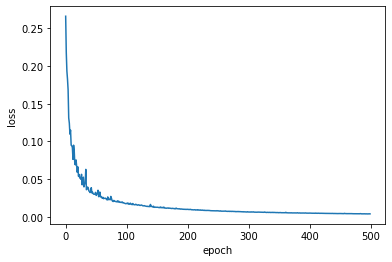

In [ ]:
import matplotlib.pyplot as plt

if not history==None:
  plt.plot(history.history['loss'])
  plt.xlabel('epoch')
  plt.ylabel('loss')
  plt.savefig('loss.png')
  plt.show()

if not history==None:
  plt.plot(history.history['val_loss'])
  plt.xlabel('epoch')
  plt.ylabel('val_loss')
  plt.savefig('val_loss.png')
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
model.save(modelPath)

INFO:tensorflow:Assets written to: /content/drive/MyDrive/WebScraping/trainnedmodel.md/assets


#Part03 : Predict

In [ ]:
import nltk
from nltk.stem.lancaster import LancasterStemmer
import string
import unicodedata
import sys
import numpy as np
import random
import tensorflow as tf
import pandas as pd

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import os

In [ ]:
pd_target = pd.read_csv(uniqueCatePath,header=None)
uniqueTarget = list(pd_target[1].unique())

print(len(uniqueTarget),uniqueTarget)

3 ['technology', 'business', 'sport']


In [ ]:
pd_word = pd.read_csv(allWordPath,header=None)
allWords = list(pd_word[0])
print(len(allWords),allWords)

2790 ['$', '01', '02', '05', '1', '100', '100m', '100mshare', '1026bn', '10bn', '10man', '11', '11bn', '12', '13bn', '14', '14m', '15m', '168m', '16bn', '1712', '1718', '1728', '1810', '18bn', '1913', '1920', '1933', '1947', '1981', '1990', '1bn', '1m', '2', '20', '2000', '2004', '2005', '2006', '2010', '2011', '20bn', '21', '2119', '21stcentury', '22', '23', '24', '25', '2500', '25bn', '26', '26500', '2727', '280bn', '2850', '28bn', '2bn', '2d', '3', '30', '300m', '31', '3137', '32', '368bn', '36m', '3g', '400m', '41', '44', '45', '45000', '475', '4bn', '50', '500', '5000m', '515m', '53', '54bn', '54m', '6', '65', '6bn', '7', '777', '800m', '81', '838', '90', '9bn', 'a', 'aaas', 'abandoned', 'aberdeen', 'able', 'about', 'above', 'absa', 'absent', 'access', 'accused', 'accusers', 'accuses', 'acquisition', 'act', 'action', 'acts', 'ad', 'addicks', 'addicts', 'adds', 'adelaide', 'admission', 'admits', 'adrianos', 'ads', 'aer', 'affordable', 'afghanistan', 'africa', 'african', 'africans',

In [ ]:
tbl = dict.fromkeys(i for i in range(sys.maxunicode) if unicodedata.category(chr(i)).startswith('P'))

# method สำหรับลบเครื่องหมายต่างๆ ใน content
def remove_punctuation(text):
    return text.translate(tbl)

# ตัด word ซ้ำออกจาก List
def getUniqueItems(datas):
  result = []
  for item in datas:
      if item not in result:
          result.append(item)
  return result

def getListFrequencyWord(wordList,contents):
  outempty = [0] * (len(wordList))
  for iWord in range(len(wordList)):    
    countWord =contents.count(wordList[iWord])    
    outempty[iWord] = countWord
  return outempty

def normalizeData(an_array):
  sum_of_rows = an_array.sum(axis=1)
  normalized_array = an_array / sum_of_rows[:, np.newaxis]
  res = [list(item) for item in normalized_array]
  return res

In [ ]:
def predictCategory(md,uniqueCategory,contentForPredict,allword):
  listContentPredict=[]
  for i,x in enumerate(contentForPredict):
    readyContent = remove_punctuation(x)
    # print("Content : ",readyContent)
    listContent = getListFrequencyWord(allword ,readyContent)
    # print("List Content :", listContent)
    listContentPredict.append(listContent)

  #listContentPredict = normalizeData(listContentPredict)
  with tf.device('/device:CPU:0'):
    Z = model.predict(listContentPredict)
    Zagrmax = Z.argmax(axis=1)
  return Z,Zagrmax

def convertZargMaxToCategory(uniqueCategory,listZ):
  listCategory=[]
  for i,x in enumerate(listZ):
    listCategory.append(uniqueCategory[x])
  return listCategory

In [ ]:
# Loads the weights
with tf.device('/device:CPU:0'):
  model = createModel(len(allWords),len(uniqueTarget))
  model.load_weights('/content/drive/MyDrive/WebScraping/trainnedmodel.md')

In [ ]:
testContentPath = '/content/drive/MyDrive/WebScraping/testcontent.txt'
with open(testContentPath, 'r') as f:
  contentForPredict1=f.read()

print(contentForPredict1)

The acclaimed PC title Call of Duty has been updated for console formats, building on many of the original's elements. For its part, the long-running Medal of Honor series has added Pacific Assault to its PC catalogue, adapting the console game Rising Sun. Call of Duty: Finest Hour casts you as a succession of allied soldiers fighting on World War 2 battlefronts including Russia and North Africa. It is a traditional first-person-viewed game that lets you control just one character, in the midst of a unit where cohorts constantly bark orders at you. On a near-identical note, Medal of Honor: Pacific Assault does all it can to make you feel part of a tight-knit team and plum in the middle of all-out action. Its arenas are the war's Pacific battles, including Guadalcanal and Pearl Harbour. You play one character throughout, a raw and rather talkative US soldier.


In [ ]:
ListContentForPredict=[]
ListContentForPredict.append(contentForPredict1)

Z,Zagrmax = predictCategory(model,uniqueTarget,ListContentForPredict,allWords)
# print("Zagrmax :",Zagrmax)

listPredictCategory = convertZargMaxToCategory(uniqueTarget,Zagrmax)
print("Predicts :",listPredictCategory)

Predicts : ['sport']
